## Bike-Sharing Analysis

##### Use the data to understand what factors affect the number of bike trips, using a predictive model to predict the number of trips in particular hour slots depending on the environment.

#### Importing Relevant Packages

In [76]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [32]:
import warnings
warnings.filterwarnings("ignore")

#### Loading Data // Sanity Checks

In [4]:
bsa = pd.read_csv("Downloads/hour.csv")
bsa.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#Checking for null values
bsa.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Checking the count for casual and registered bikes equals to the total count
np.sum((bsa.casual + bsa.registered) != bsa.cnt)

0

In [10]:
#Checking monthly values (1-12)
np.unique(bsa.mnth)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
#Checking hours (0-23)
np.unique(bsa.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [12]:
#Dropping irrelevant columns 
cols_to_drop = ['casual', 'registered', 'dteday', 'instant']
bsa1 = bsa.drop(cols_to_drop, axis=1).copy()

In [16]:
bsa1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [17]:
bsa1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


#### Checking for column abnormalities

<AxesSubplot:ylabel='Density'>

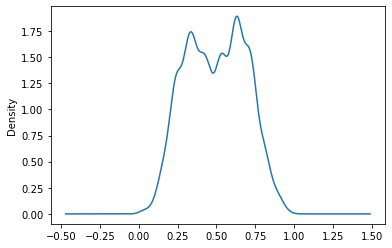

In [24]:
#Checking centrality and possibility of outliers in the tempurature columns
bsa.temp.plot.density()

In [ ]:
#Data for tempurature seeems fairly centralised

<AxesSubplot:xlabel='atemp'>

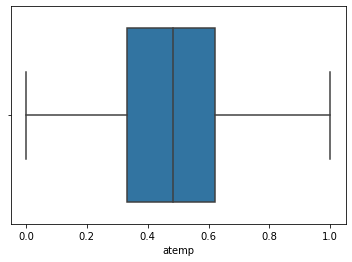

In [33]:
sns.boxplot(bsa1.atemp)

In [26]:
#Does not seem to be outliers present for atemp

<AxesSubplot:ylabel='Frequency'>

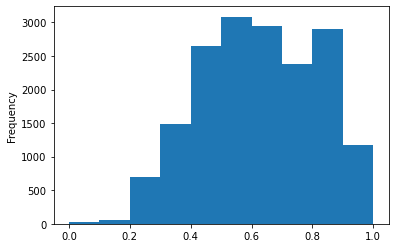

In [27]:
#Plotting histogram for hum to check for any abnormally high values
bsa1.hum.plot.hist()

In [28]:
#no abnormally large values present

<AxesSubplot:ylabel='Density'>

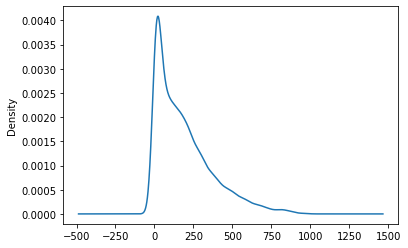

In [29]:
#Checking cnt variable for abornomalities
bsa1.cnt.plot.density()

<AxesSubplot:xlabel='cnt'>

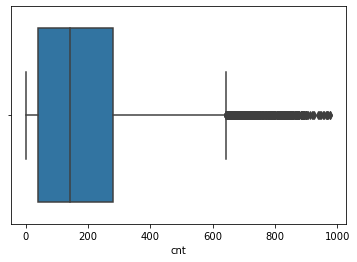

In [34]:
sns.boxplot(bsa1.cnt)

In [31]:
#Both plots show there are some abnormally high values present in this column (cnt)

In [35]:
#Outlier Treatment - split data into percentiles and decide a cutoff point
bsa1.cnt.quantile([0.1, 0.25, 0.50, 0.70, 0.9, 0.95, 0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.70    244.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [36]:
#Interpretation - 563 is the 95th percentile meaning only 5% of the data records are higher than this which is a suitable cutoff
bsa2 = bsa1[bsa1.cnt < 563].copy()

<AxesSubplot:ylabel='Density'>

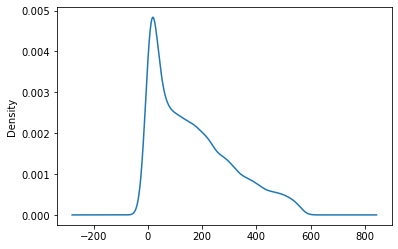

In [41]:
bsa2.cnt.plot.density()

<AxesSubplot:xlabel='cnt'>

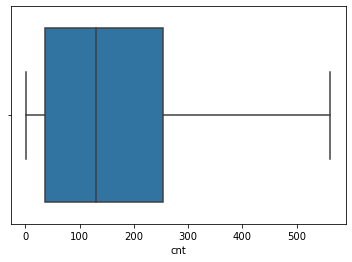

In [42]:
sns.boxplot(bsa2.cnt)

In [43]:
#slightly more centralised density plot and data points not present on the tail end of the boxplot

#### Bivariate Analysis

<AxesSubplot:xlabel='hr', ylabel='cnt'>

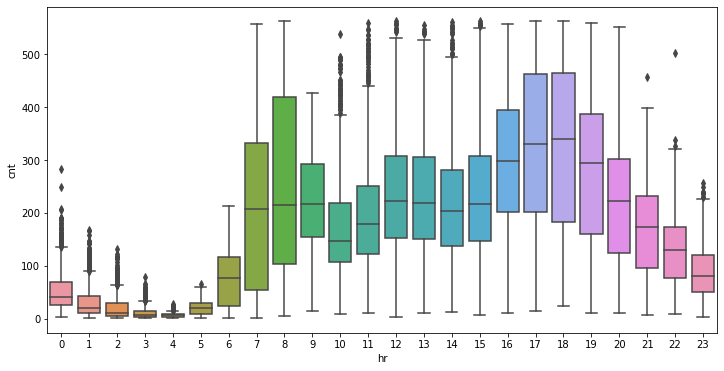

In [46]:
#1 - Check patterns between bike (cnt) and hours used
plt.figure(figsize=[12,6])
sns.boxplot("hr", "cnt", data=bsa2)

In [47]:
#Peak hours between 5-7pm as well as 7-8am having high upper quartile values. Most likely due to these times between commuting from and to work respectively.

<AxesSubplot:xlabel='hr', ylabel='cnt'>

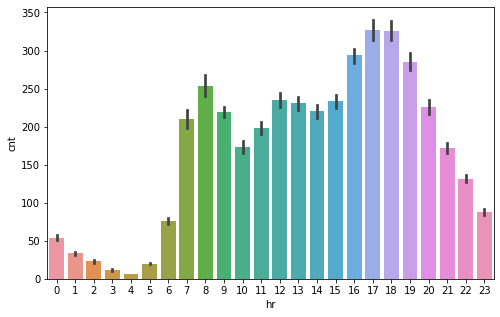

In [56]:
plt.figure(figsize=[8,5])
sns.barplot('hr', 'cnt', data=bsa2)

In [57]:
#Alternate visualisation of the comparason, we see spikes at hours 7-8 and 17-18 compared to the hours before then due to commuting assumptions with fairly constant values between them. after 6pm, the usage slowly decreases.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

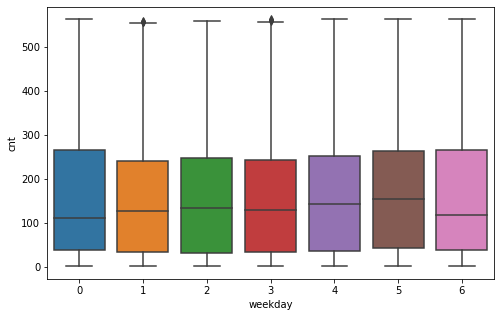

In [52]:
#2 - Check patterns between the bike (cnt) and weekday used
plt.figure(figsize=[8,5])
sns.boxplot("weekday", "cnt", data=bsa2)

In [ ]:
#No particular trend in bikes used in relation to the day of the week.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

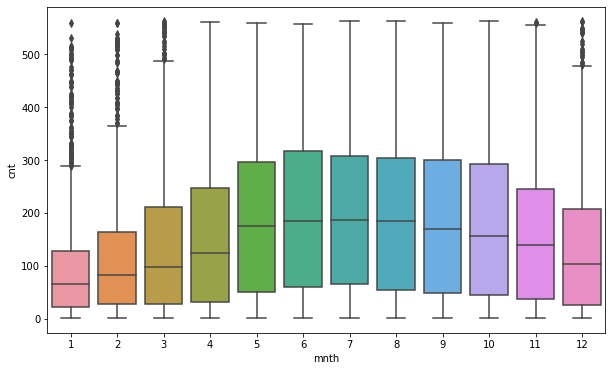

In [51]:
#3 - Check patterns between bike (cnt) and months
plt.figure(figsize=[10,6])
sns.boxplot("mnth", "cnt", data=bsa2)

In [50]:
#As expected bike usages start to pickup towards the end of spring (may time) and stay high throughout summer and towards the end of autumn. With winter showing the least cnt values.

<AxesSubplot:xlabel='season', ylabel='cnt'>

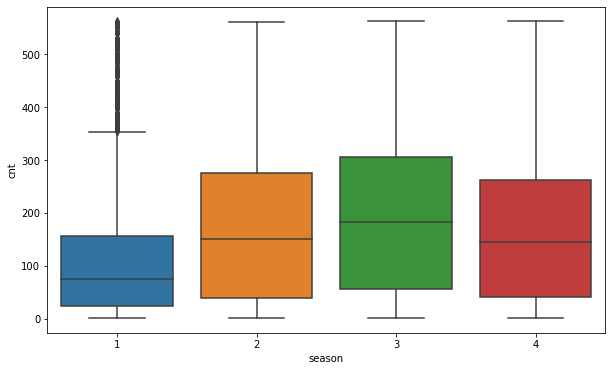

In [53]:
#4 Checking the patterns in seasons to bike (cnt) to verify our previous results
plt.figure(figsize=[10,6])
sns.boxplot("season", 'cnt', data=bsa2)

In [54]:
#Highest bike usage during summer (green) with spring and autumn following behind and winter being the lowest.

<AxesSubplot:>

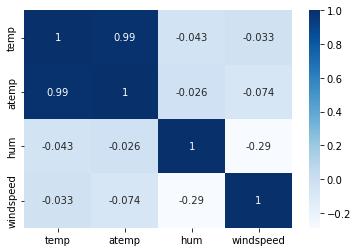

In [61]:
#5 - Correlation matrix to see the whole picture easily
vars = ['temp', 'atemp', 'hum', 'windspeed']
corrs = bsa2[vars].corr()
corrs
sns.heatmap(corrs, annot=True, cmap='Blues')

In [62]:
#As expected the two temperature variables are nearly 100% correlated while only the humidity and windspeed variables are somewhat with the others being practically not at all.

#### Data Preprocessing

In [63]:
#Treat the 'mnth' column
#Replace the 5,6,7,8,9 values with single value 5 as they have very similar cnt values and have them replaced with dummy values.
#The dummy values will ensure they have no affect on the other variables.

bsa3 = bsa2.copy()
bsa3.mnth[bsa3.mnth.isin([5,6,7,8,9])] = 5
np.unique(bsa3.mnth)

array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [65]:
#Treat the 'hr' column
#The hours outside and inbetween the commuting times are grouped up into two subgroups which are similar in cnt values

bsa3.hr[bsa3.hr.isin([0,1,2,3,4,5])] = 0
bsa3.hr[bsa3.hr.isin([11,12,13,14,15])] = 11
np.unique(bsa3.hr)

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [66]:
#Creating dummy columns for the relevant variables
cat_cols = ['season', 'weathersit', 'weekday', 'mnth','hr']
bsa3 = pd.get_dummies(bsa3, columns = cat_cols, drop_first=True)

In [67]:
bsa3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

#### Train Test Split

In [71]:
df_train, df_test = train_test_split(bsa3, train_size = 0.7, random_state=100)

In [72]:
y_train = df_train.pop("cnt")
X_train = df_train

In [73]:
y_test = df_test.pop("cnt")
X_test = df_test

#### Model Building

In [75]:
#Creating LinearRegression object and fitting train data to it
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
#Predicting R2 Score of the train dataset
y_train_pred = lr.predict(X_train)
r2_score(y_train, y_train_pred)

0.670253268131763

In [79]:
#Predicting R2 Score of the test dataset
y_test_pred = lr.predict(X_test)
r2_score(y_test, y_test_pred)

0.6643922574076249

In [ ]:
#As both scores are somewhat similar the model built using LinearRegression is fairly accurate.